## 1. Understanding the business

In this case, it is quite simple. This type of task will be helpful for non-profit organizations that rely on donations. Accurately determining the income of a potential donor is quite important to understand whether it is worth contacting such a person at all, and what kind of help to ask for. Thus, our goal is to build a model that will predict whether a person earns more than `$50k.

## 2. Data Working

**Features**
- `age`: Age
- `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- `education-num`: Number of educational years completed
- `marital-status`: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- `race`: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- `capital-gain`: Monetary Capital Gains
- `capital-loss`: Monetary Capital Losses
- `hours-per-week`: Average Hours Per Week Worked
- `native-country`: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

**Target Variable**
- `income`: Income Class (<=50K, >50K)

### 2.1 Imports

In [1]:
# basic imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# model selection
from sklearn.model_selection import train_test_split

# feature eng and preprocessing
import featuretools as ft
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.pipeline import Pipeline

# hiperparams optimalization
import optuna as opt

# metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

2024-06-14 22:11:38,478 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "DiversityScore" from "premium_primitives.diversity_score" because a primitive with that name already exists in "nlp_primitives.diversity_score"
2024-06-14 22:11:38,487 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "LSA" from "premium_primitives.lsa" because a primitive with that name already exists in "nlp_primitives.lsa"
2024-06-14 22:11:38,487 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "MeanCharactersPerSentence" from "premium_primitives.mean_characters_per_sentence" because a primitive with that name already exists in "nlp_primitives.mean_characters_per_sentence"
2024-06-14 22:11:38,488 featuretools - WARNING    While loading primitives via "premium_primitives" entry point, ignored primitive "NumberOfSentences" from "premium_primi

### 2.2 Notebook settings

In [2]:
### All rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# SNS Options
sns.set_theme(style="darkgrid", palette="Dark2")

# Global Values
SEED = 80
target_names = ['Under 50K', 'Over 50K']


### 2.3 Dataset Import

In [3]:
df = pd.read_csv('data\census.csv')

## 3. Understanding the data

In [4]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [5]:
df.shape

(45222, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [7]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
no_of_records = df.shape[0]
print(f'Number of records: {no_of_records}')

no_of_greater_50k = df[df['income'] == '>50K'].shape[0]
print(f'Number of records greater than 50K: {no_of_greater_50k}.')
greater_perc = round((no_of_greater_50k / no_of_records) * 100, 2)
print(f'Percentage of >50K class {greater_perc} %')

no_of_less_50k = df[df['income'] == '<=50K'].shape[0]
print(f'Number of records less than 50K: {no_of_less_50k}')
less_perc = round((no_of_less_50k / no_of_records) * 100, 2)
print(f'Percentage of <=50K class {less_perc} %')

Number of records: 45222
Number of records greater than 50K: 11208.
Percentage of >50K class 24.78 %
Number of records less than 50K: 34014
Percentage of <=50K class 75.22 %


Our target class are inbalanced that why we need to use over sampling algorytm like RandomOverSampling, SMOTE, ADASYN

In [9]:
def distrubutions_charts(dataframe) :
    """ Function that show distrubution charts for numeric columns

        Args:
            dataframe -> set with data
    """
    num_col = dataframe.select_dtypes(include= 'number').columns.to_list()
    for col in num_col :
        plt.figure(figsize=(17,6))
        sns.countplot(data=dataframe, x=col)
        plt.title(str.capitalize(col))
        plt.xticks(rotation=90)
        plt.show()

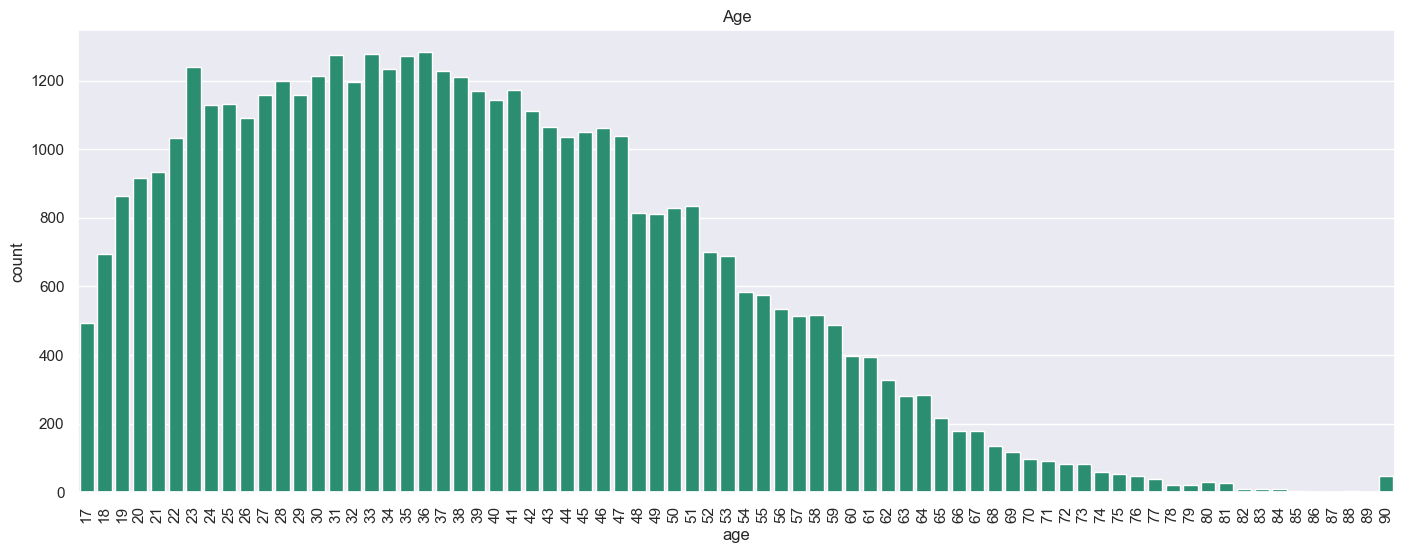

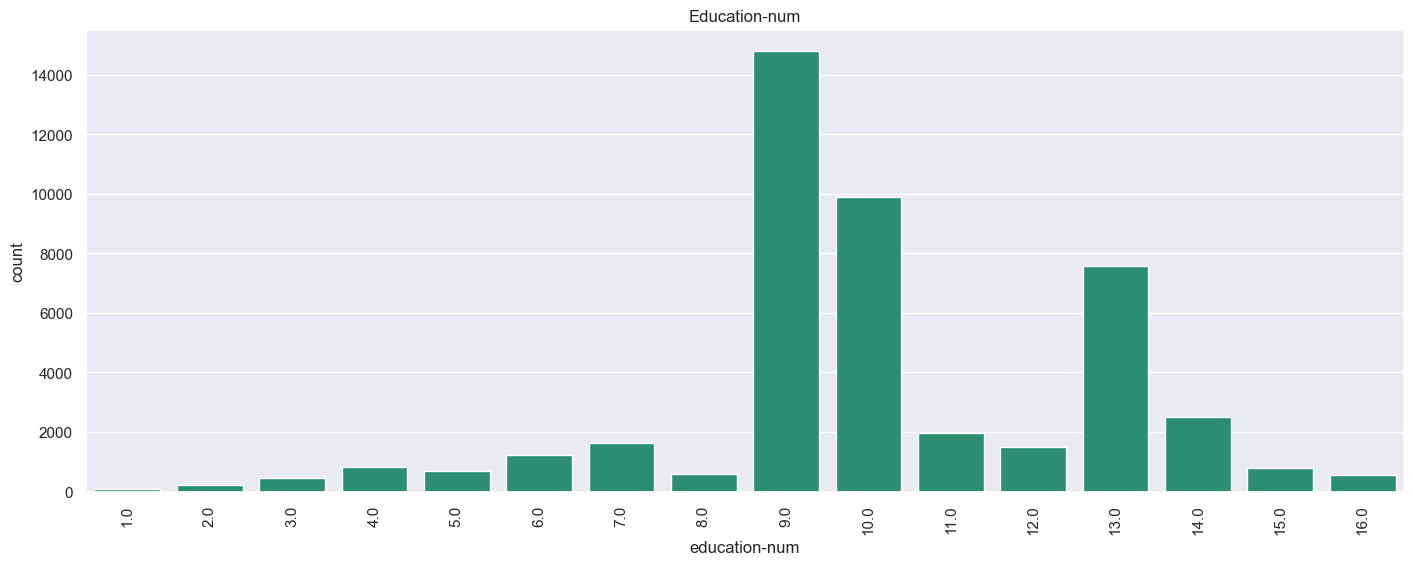

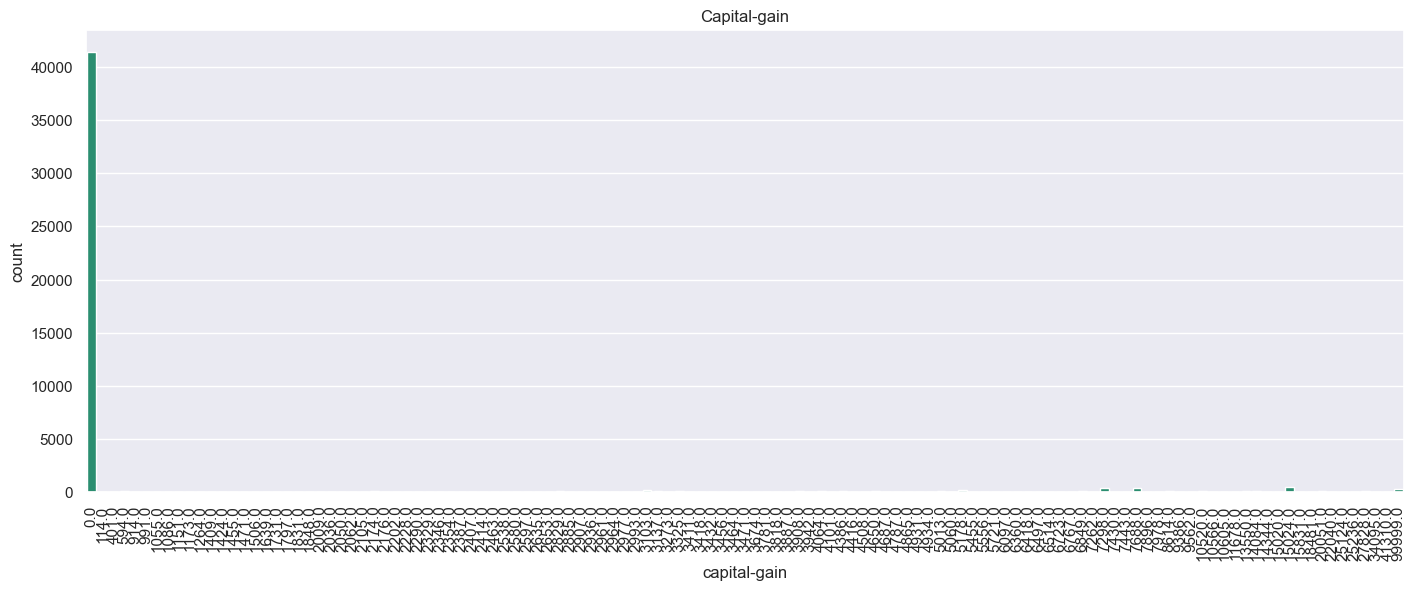

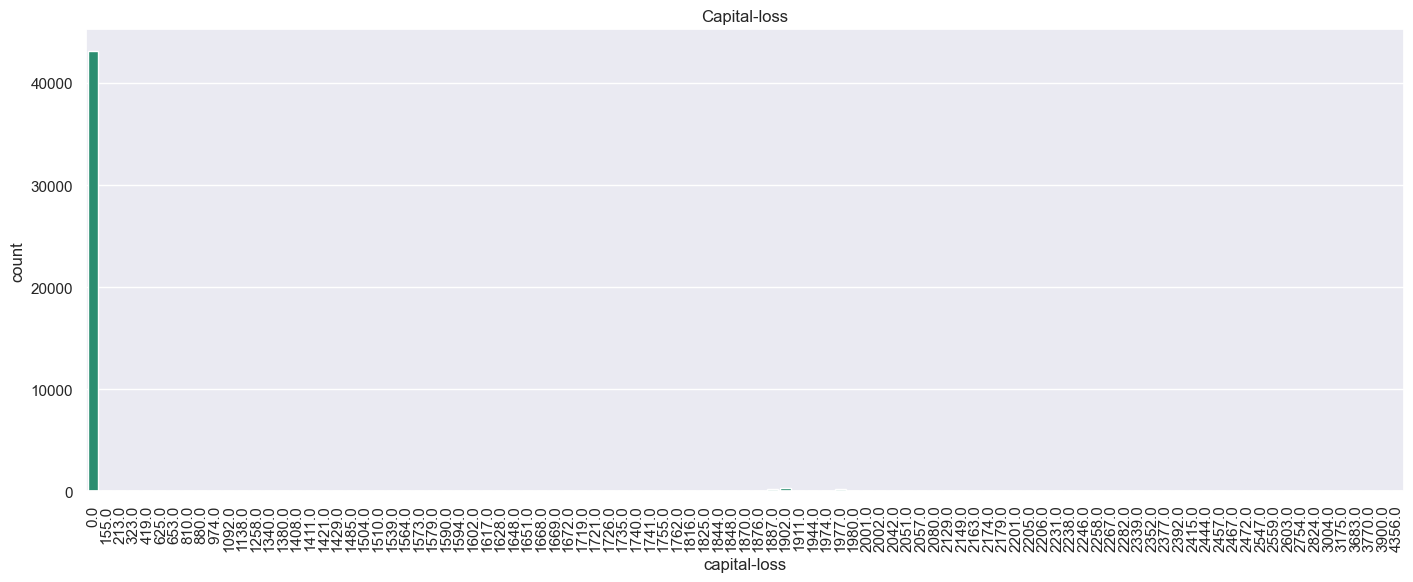

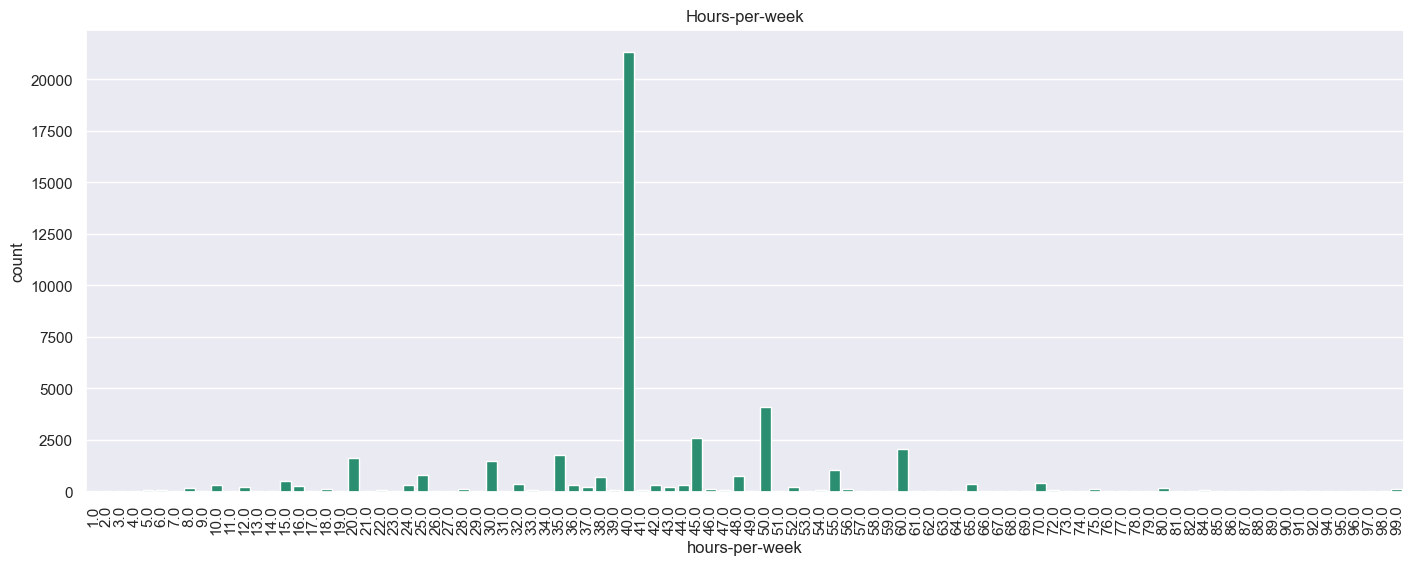

In [10]:
distrubutions_charts(df)

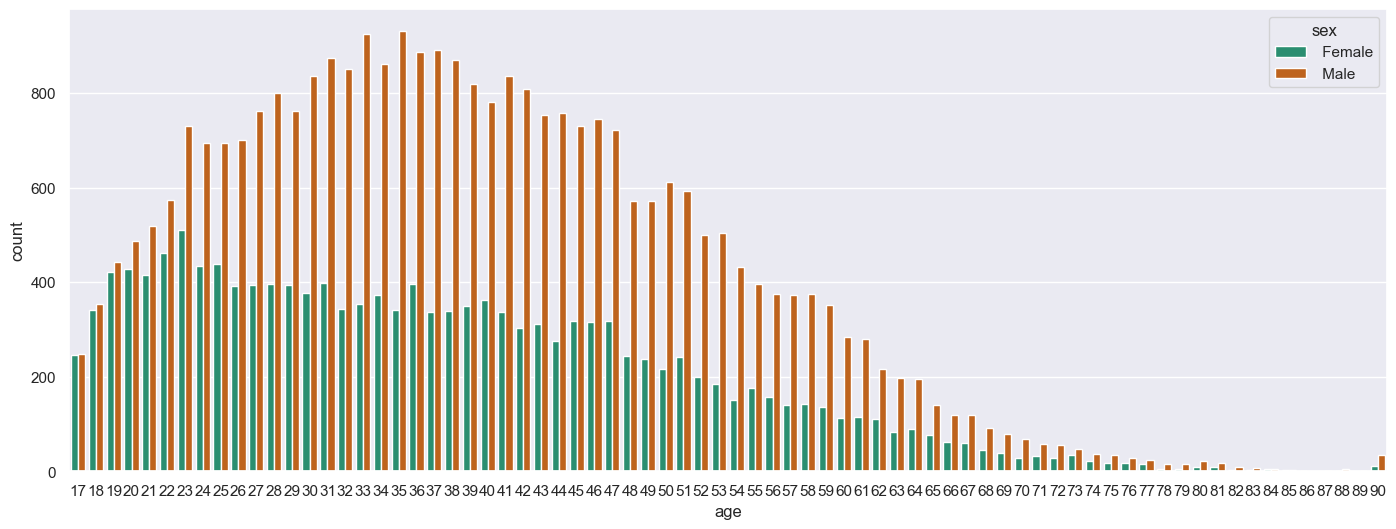

In [11]:
# Age distrubution
plt.figure(figsize=(17,6))
sns.countplot(data= df, x = 'age', hue = 'sex')
plt.show()

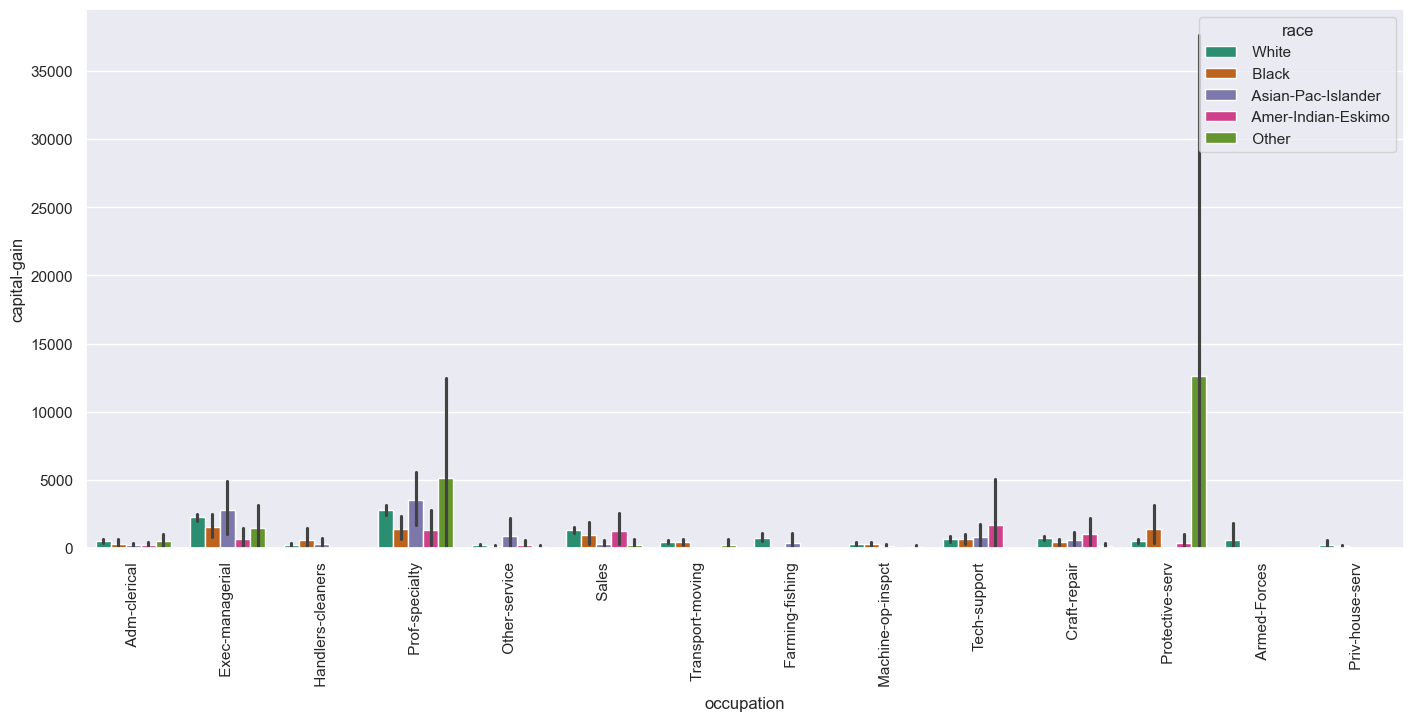

In [12]:
# Capitan-Gain Distribution
plt.figure(figsize=(17,7))
sns.barplot(x='occupation', y="capital-gain", hue='race', data=df)
plt.xticks(rotation=90)
plt.show()

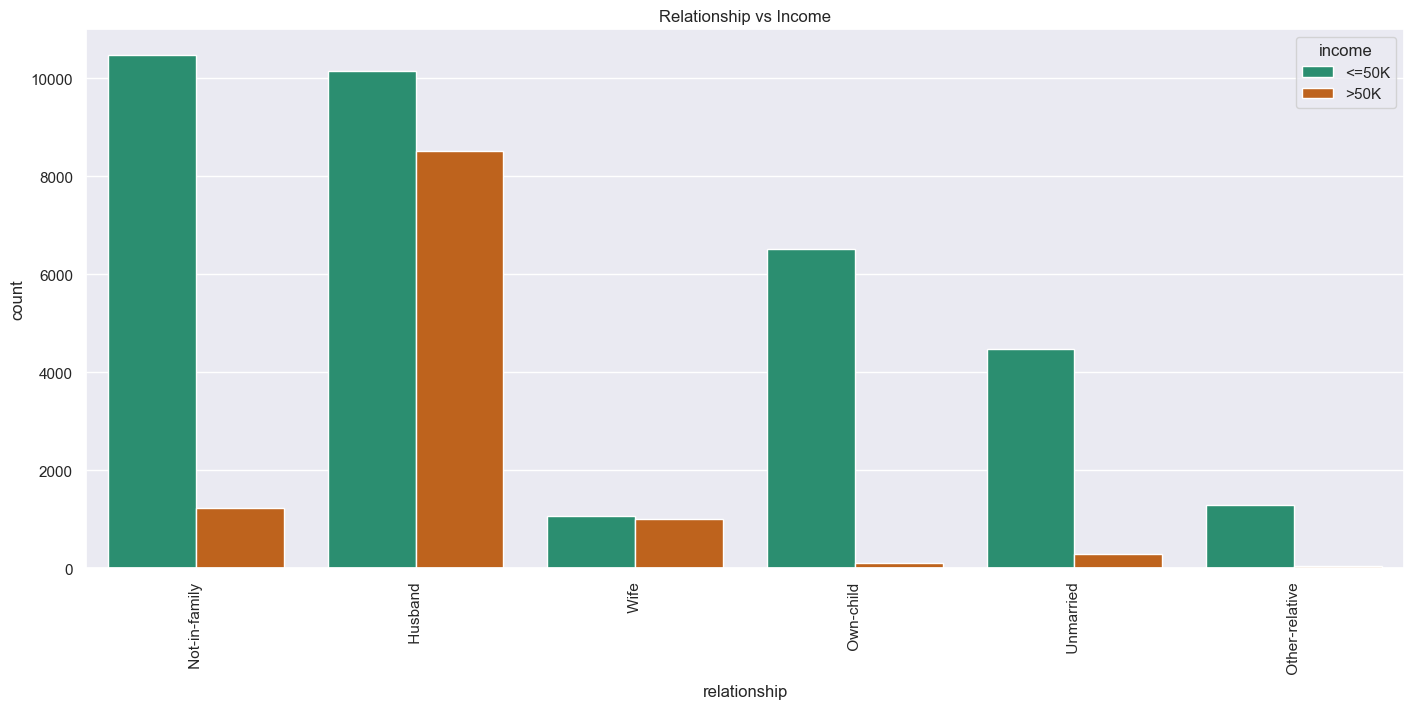

In [13]:
# Capitan-Gain Distribution
plt.figure(figsize=(17,7))
sns.countplot(x='relationship', hue='income', data=df)
plt.title('Relationship vs Income')
plt.xticks(rotation=90)
plt.show()

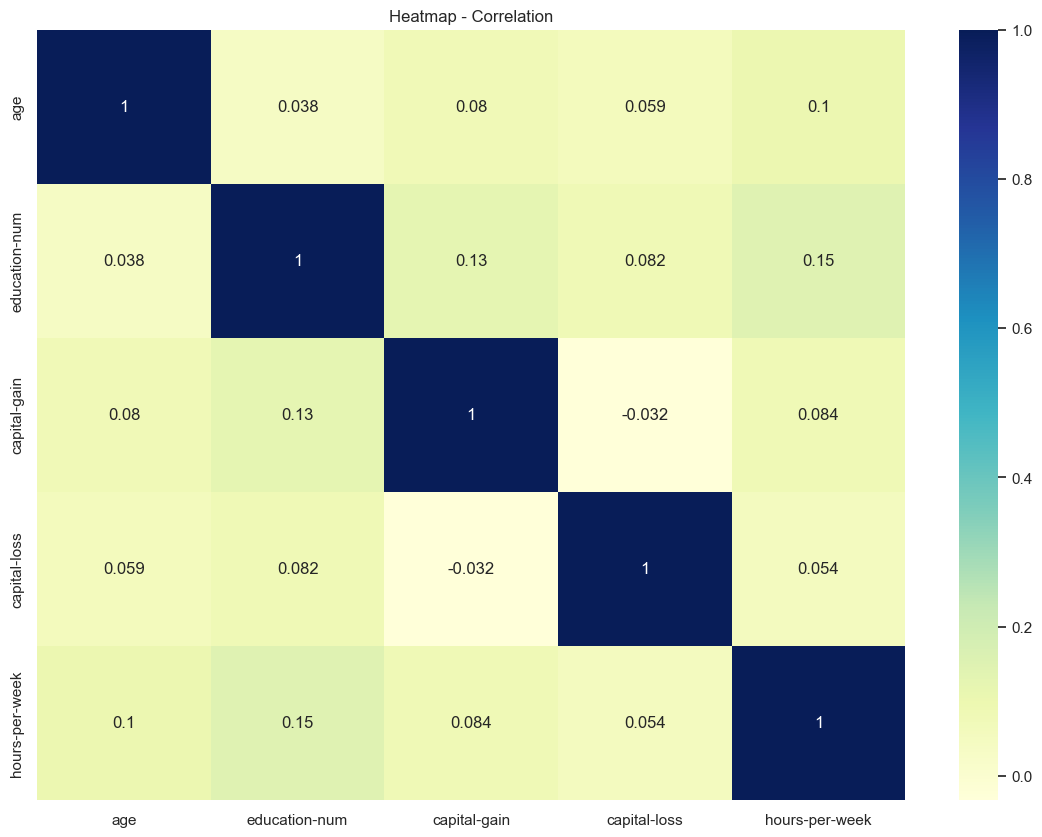

In [14]:
# Heatmap of correlation
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include= 'number').corr(method= 'pearson'), cmap=  "YlGnBu", annot= True)
plt.title('Heatmap - Correlation')
plt.show()

## 4. Data Cleaning

### 4.1 Missing Values

In [15]:
df.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

We don't have any missing values

In [16]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### 4.2 Outliners

In [17]:
def outliners(dataframe) :
    num_col = dataframe.select_dtypes(include = 'number').columns.to_list()
    for col in num_col :
        sns.boxplot(data= df, x= col)
        plt.show()

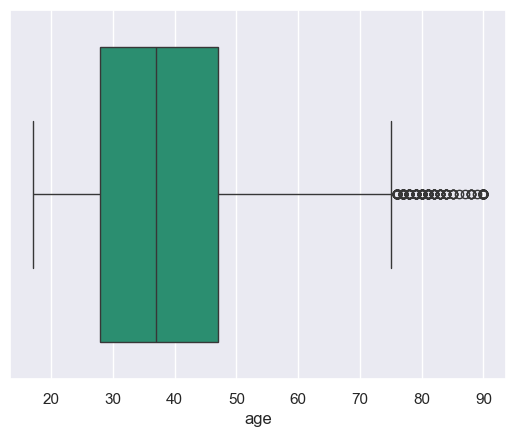

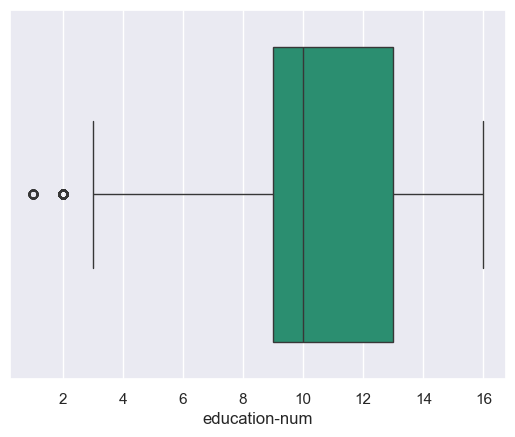

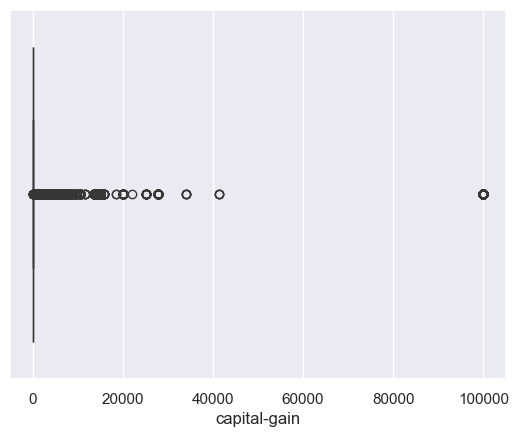

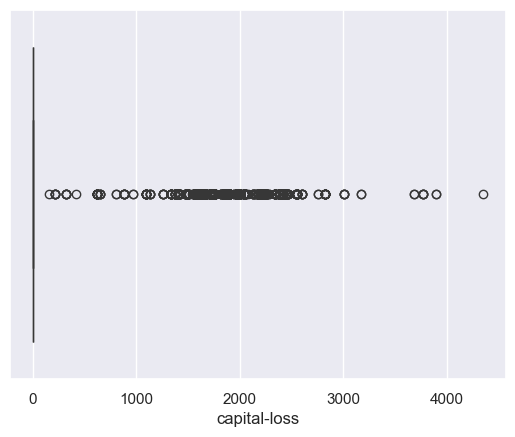

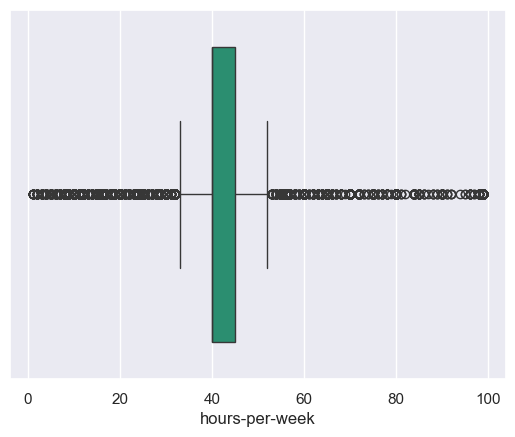

In [18]:
outliners(df)

In [19]:
def dataset_IQR(col) :
    """ Calculate IQR for given column
     
    Args:
        col -> column for IQR calculation

    Return:
        IQR value of specific column, value -> float
    
    """
    return np.quantile(col, 0.75) - np.quantile(col, 0.25)


In [20]:
def lower_tresh(col):
    """ Calculate lower treshold

    Args:
        col -> column for IQR calculation

    Return:
        lower outliner value -> float
    """ 
    return np.quantile(col, 0.25) - (1.5 * dataset_IQR(col))

In [21]:
def upper_tresh(col) :
    """ Calculate upper treshold

    Args:
        col -> column for IQR calculation

    Return:
        upper outliner value -> float
    """ 
    return np.quantile(col, 0.75) + (1.5 * dataset_IQR(col))

In [22]:
def lower_treshholders(dataframe) :
    """ Check how many outliners-lower we have for each column
    
    Args:
        dataframe -> dataframe from where we load data
    
    """
    for x in dataframe.select_dtypes(include= 'number') :
        if dataframe[x][dataframe[x] < lower_tresh(dataframe[x])].count() > 0 :
            print(f'Column: {x}')
            print(f'Lower treshold {lower_tresh(dataframe[x])}')
            print(f'Ilosc wartosci ponizej dolnego outlinera: {dataframe[x][dataframe[x] < lower_tresh(dataframe[x])].count()}\n')

In [23]:
def upper_treshholders(dataframe) :
    """ Check how many outliners-upper we have for each column
    
    Args:
        dataframe -> dataframe from where we load data
    
    """
    for x in dataframe.select_dtypes(include= 'number') :
        if dataframe[x][dataframe[x] > upper_tresh(dataframe[x])].count() > 0 :
            print(f'Column: {x}')
            print(f'Upper treshold {upper_tresh(dataframe[x])}')
            print(f'Ilosc wartosci powyzej górnego outlinera: {dataframe[x][dataframe[x] > upper_tresh(dataframe[x])].count()}\n')

In [24]:
# Lowers Treshold column outliners
lower_treshholders(df)

Column: education-num
Lower treshold 3.0
Ilosc wartosci ponizej dolnego outlinera: 294

Column: hours-per-week
Lower treshold 32.5
Ilosc wartosci ponizej dolnego outlinera: 6918



In [25]:
# Upper Treshold column outliners
upper_treshholders(df)

Column: age
Upper treshold 75.5
Ilosc wartosci powyzej górnego outlinera: 269

Column: capital-gain
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 3790

Column: capital-loss
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 2140

Column: hours-per-week
Upper treshold 52.5
Ilosc wartosci powyzej górnego outlinera: 4981



## 5. Feature Enginering

In [26]:
# Copy of dataframe
df_new = df.copy()

In [27]:
df.shape, df_new.shape

((45222, 14), (45222, 14))

In [28]:
# Save new dataframe to CSV
df_new.to_csv('data\census_new.csv')

In [29]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
38086,31,Private,Bachelors,13.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
37911,34,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
13313,22,Private,Assoc-acdm,12.0,Never-married,Adm-clerical,Own-child,White,Female,0.0,0.0,27.0,United-States,<=50K
36305,47,Federal-gov,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,Other,Male,0.0,0.0,40.0,Peru,>50K
4207,26,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,4064.0,0.0,50.0,United-States,<=50K
35020,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,1485.0,17.0,United-States,>50K
2204,19,Private,HS-grad,9.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,35.0,United-States,<=50K
34634,19,Private,11th,7.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,15.0,Germany,<=50K
8338,47,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K
6690,42,State-gov,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,72.0,India,>50K


### 5.1 New Features

In [30]:
# Add profit column
df_new['profit'] = df_new['capital-gain'] - df['capital-loss']

In [31]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit
44995,38,Private,Bachelors,13.0,Separated,Farming-fishing,Unmarried,White,Female,0.0,0.0,45.0,United-States,<=50K,0.0
28238,27,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,Black,Male,0.0,0.0,60.0,United-States,>50K,0.0
1623,32,Private,11th,7.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0
39818,52,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K,0.0
9435,90,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0
4708,47,State-gov,Some-college,10.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,30.0,United-States,<=50K,0.0
33584,64,Self-emp-inc,Masters,14.0,Married-civ-spouse,Sales,Husband,White,Male,6418.0,0.0,65.0,United-States,>50K,6418.0
32345,47,Private,Some-college,10.0,Divorced,Tech-support,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0
26721,47,Federal-gov,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0
8604,50,Private,HS-grad,9.0,Divorced,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,>50K,0.0


In [32]:
# Add hour per day work
df_new['hours-per-day'] = round(df_new['hours-per-week'] / 5, 1)

In [33]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day
29078,47,Private,Bachelors,13.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7688.0,0.0,44.0,United-States,>50K,7688.0,8.8
19798,30,Private,HS-grad,9.0,Never-married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
42818,45,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K,0.0,10.0
41614,46,Private,Some-college,10.0,Divorced,Exec-managerial,Not-in-family,White,Male,0.0,0.0,50.0,United-States,<=50K,0.0,10.0
10271,28,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0
19829,29,Self-emp-inc,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,80.0,United-States,<=50K,0.0,16.0
28558,52,State-gov,Assoc-acdm,12.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0
32083,48,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0
9204,40,Self-emp-inc,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K,0.0,12.0
39921,45,Private,Some-college,10.0,Married-spouse-absent,Sales,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0,8.0


In [34]:
# Add Gain per day
df_new['gain-per-day'] = round(df_new['capital-gain'] / df_new['hours-per-day'], 1)

In [35]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day,gain-per-day
32779,29,State-gov,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0,8.0,0.0
2112,56,Private,HS-grad,9.0,Divorced,Craft-repair,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0,8.0,0.0
18450,56,Private,7th-8th,4.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0.0,0.0,48.0,United-States,<=50K,0.0,9.6,0.0
17134,34,Private,HS-grad,9.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,0.0,20.0,United-States,<=50K,0.0,4.0,0.0
24385,30,Self-emp-inc,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K,0.0,12.0,0.0
29634,22,Private,Some-college,10.0,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,35.0,United-States,<=50K,0.0,7.0,0.0
30508,40,Private,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0,0.0
32760,39,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,70.0,United-States,>50K,0.0,14.0,0.0
43576,34,Private,Masters,14.0,Divorced,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,0.0,0.0,40.0,South,<=50K,0.0,8.0,0.0
39202,52,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688.0,0.0,40.0,United-States,>50K,7688.0,8.0,961.0


In [36]:
# Feature tool

entity = ft.EntitySet(id = 'my_data')

In [37]:
entity = entity.add_dataframe(dataframe_name ='data', dataframe = df_new, index='index')

In [38]:
df_ft, feature_defs = ft.dfs(entityset= entity, target_dataframe_name='data', max_depth= 5)

In [39]:
feature_defs

[<Feature: age>,
 <Feature: workclass>,
 <Feature: education_level>,
 <Feature: education-num>,
 <Feature: marital-status>,
 <Feature: occupation>,
 <Feature: relationship>,
 <Feature: race>,
 <Feature: sex>,
 <Feature: capital-gain>,
 <Feature: capital-loss>,
 <Feature: hours-per-week>,
 <Feature: native-country>,
 <Feature: income>,
 <Feature: profit>,
 <Feature: hours-per-day>,
 <Feature: gain-per-day>]

In [40]:
df_ft.sample(20)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day,gain-per-day
index,,,,,,,,,,,,,,,,,
37950,90,Federal-gov,Masters,14.0,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,99.0,United-States,<=50K,0.0,19.8,0.0
23727,55,Private,HS-grad,9.0,Widowed,Other-service,Unmarried,White,Female,0.0,0.0,30.0,United-States,<=50K,0.0,6.0,0.0
39318,44,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,>50K,0.0,10.0,0.0
466,24,Private,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.0,8.0,0.0
30018,42,Private,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,89.0,United-States,>50K,0.0,17.8,0.0
18108,20,Private,Some-college,10.0,Never-married,Sales,Own-child,Asian-Pac-Islander,Male,0.0,0.0,30.0,Philippines,<=50K,0.0,6.0,0.0
16587,52,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,White,Male,0.0,0.0,38.0,United-States,<=50K,0.0,7.6,0.0
37404,24,Private,HS-grad,9.0,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0.0,0.0,65.0,United-States,<=50K,0.0,13.0,0.0
26538,41,Private,HS-grad,9.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,40.0,Peru,<=50K,0.0,8.0,0.0


In [41]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 45221
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45222 non-null  int64   
 1   workclass        45222 non-null  category
 2   education_level  45222 non-null  category
 3   education-num    45222 non-null  float64 
 4   marital-status   45222 non-null  category
 5   occupation       45222 non-null  category
 6   relationship     45222 non-null  category
 7   race             45222 non-null  category
 8   sex              45222 non-null  category
 9   capital-gain     45222 non-null  float64 
 10  capital-loss     45222 non-null  float64 
 11  hours-per-week   45222 non-null  float64 
 12  native-country   45222 non-null  category
 13  income           45222 non-null  category
 14  profit           45222 non-null  float64 
 15  hours-per-day    45222 non-null  float64 
 16  gain-per-day     45222 non-null  float64 
dty

### 5.2 Encoding

In [42]:
# List of category columns
cat_col = df_ft.select_dtypes(include= 'category').columns.to_list()

In [43]:
# Init of encoder
label = LabelEncoder()

In [44]:
# Function to encode categorical columns
def encode_cat(dataframe) :
    """ Function that encoode all categorical columns from given dataset

        Args:
            dataframe -> our dataframe where we want to make encoding
    """
    for col in cat_col :
        dataframe[col] = label.fit_transform(dataframe[col])

In [45]:
encode_cat(df_ft)

In [46]:
df_ft.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day,gain-per-day
index,,,,,,,,,,,,,,,,,
0,39,5,9,13.0,4,0,1,4,1,2174.0,0.0,40.0,38,0,2174.0,8.0,271.8
1,50,4,9,13.0,2,3,0,4,1,0.0,0.0,13.0,38,0,0.0,2.6,0.0
2,38,2,11,9.0,0,5,1,4,1,0.0,0.0,40.0,38,0,0.0,8.0,0.0
3,53,2,1,7.0,2,5,0,2,1,0.0,0.0,40.0,38,0,0.0,8.0,0.0
4,28,2,9,13.0,2,9,5,2,0,0.0,0.0,40.0,4,0,0.0,8.0,0.0


In [47]:
df_ft.sample(20)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day,gain-per-day
index,,,,,,,,,,,,,,,,,
32889,56,5,9,13.0,2,9,0,4,1,0.0,1902.0,48.0,38,1,-1902.0,9.6,0.0
9343,29,2,1,7.0,2,2,0,4,1,3942.0,0.0,50.0,38,0,3942.0,10.0,394.2
13064,17,2,0,6.0,4,11,3,4,1,0.0,0.0,15.0,38,0,0.0,3.0,0.0
22684,51,2,11,9.0,2,6,0,4,1,0.0,0.0,45.0,38,1,0.0,9.0,0.0
14377,49,2,9,13.0,2,3,0,4,1,0.0,0.0,40.0,38,1,0.0,8.0,0.0
8453,32,5,11,9.0,2,10,0,4,1,0.0,0.0,40.0,38,0,0.0,8.0,0.0
20312,30,2,15,10.0,2,9,5,1,0,0.0,0.0,5.0,38,1,0.0,1.0,0.0
19698,28,2,12,14.0,4,12,1,4,0,0.0,0.0,40.0,38,0,0.0,8.0,0.0
31055,19,2,11,9.0,4,0,3,4,1,0.0,0.0,50.0,38,0,0.0,10.0,0.0


## 6. Modeling

### 6.1 Data Split

In [48]:
# Data selection for model
X = df_ft.drop(columns= 'income')
y = df_ft['income'].values.ravel()

In [49]:
# Split data to train and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= SEED, stratify= y)

In [50]:
print(f'Train set size : {X_train.shape}, {y_train.shape}')
print(f'Test set size : {X_test.shape}, {y_test.shape}')

Train set size : (36177, 16), (36177,)
Test set size : (9045, 16), (9045,)


### 6.2 Base Model - Without Preprocessing

In [51]:
# Model Init
log_reg = LogisticRegression(random_state=SEED)

In [52]:
# Train model
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=80)

In [53]:
#Predict model
y_base_pred = log_reg.predict(X_test)

#### 6.2.1 Classification Report

In [54]:
model_score = {}

In [55]:
def class_report(pred) :
    print("Classification Report:")
    classification_decision = classification_report(y_test, pred, target_names = target_names, output_dict=True)
    print(pd.DataFrame(classification_decision).transpose())

#### 6.2.2 Confusion Matrix Report

In [56]:
def conf_matrix(pred) :
    cnf_matrix = confusion_matrix(y_test, pred)
    # Heatmap to show confision matrix
    class_names=target_names
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

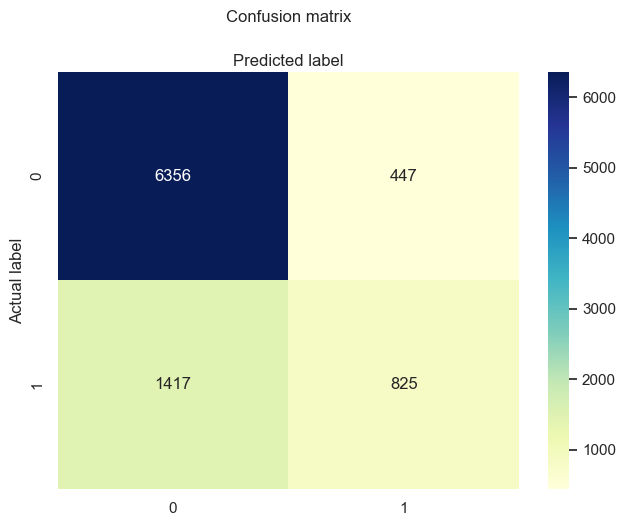

In [57]:
conf_matrix(y_base_pred)

#### 6.2.3 ROC Curve

In [58]:
def roc_cur(test, pred) :
    fpr, tpr, _ = roc_curve(test, pred)
    auc = roc_auc_score(test, pred)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

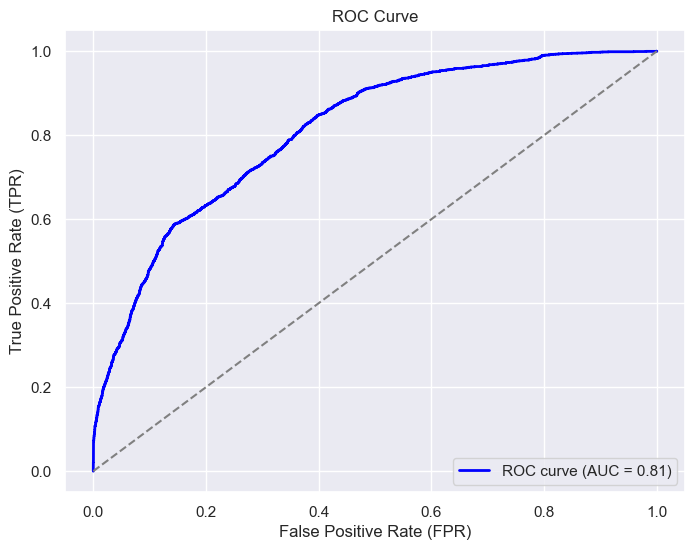

In [59]:
# Receiver Operating Characteristic on chart
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
roc_cur(y_test, y_pred_proba)

### 6.3 Preprocessing

In [60]:
# Data scaling 
scaler = StandardScaler()

In [61]:
# ADASYN implementation to imbalance classification classes
adasyn = ADASYN(sampling_strategy= 'auto', random_state= SEED)

In [62]:
#Strat. to split data with balanced split for both classes
skf = StratifiedKFold(n_splits=5, random_state= SEED, shuffle= True)

#### 6.3.1 Model Implementation

In [63]:
# Model Implementation

# Linear Models
log_model = LogisticRegression(random_state= SEED)
nb_model = GaussianNB()
svc_model = LinearSVC(random_state= SEED)
knn_model = KNeighborsClassifier()

# Tree Models
dec_model = DecisionTreeClassifier(random_state= SEED)
ran_model = RandomForestClassifier(random_state= SEED)
ada_model = AdaBoostClassifier(random_state= SEED)
gra_model = GradientBoostingClassifier(random_state= SEED)
xgb_model = XGBClassifier(random_state = SEED)


In [64]:
def feature_selector(model) :

    try:
        selector = RFECV(estimator= model, step= 1, cv = skf, scoring= 'accuracy')
        selector.fit(X_train, y_train)
        X_train_reduced = selector.transform(X_train)
        X_test_reduced = selector.transform(X_test)
        features = selector.n_features_
        return X_train_reduced, X_test_reduced, features
    except ValueError as ve:
        print('Erorr {ve}. This model don"t have feature selector, need to use default RandomForestSelector' )
        rf = RandomForestClassifier(random_state= SEED)
        selector = RFECV(estimator= rf, step= 1, cv = 5, scoring= 'accuracy')
        selector.fit(X_train, y_train)
        X_train_reduced = selector.transform(X_train)
        X_test_reduced = selector.transform(X_test)
        features = selector.n_features_
    return X_train_reduced, X_test_reduced, features


In [65]:
def evalute_model(model, train, type, feat) :
    if type == 'lin' :
        pipeline = Pipeline(steps=[
            ('scaler', scaler),
            ('adasyn', adasyn),
            ('classification', model)
            ])
    else :
        pipeline = Pipeline(steps=[
            ('adasyn', adasyn),
            ('classification', model)
            ])

    score = cross_val_score(pipeline, train, y_train, cv = skf, scoring= 'accuracy')

    print(f"Model: {model}")
    print(f"Średnia F1: {np.mean(score):.4f}")
    print(f"Liczba cech : {feat:.4f}")

        

In [66]:
def train_model(model, type, train, test) :
    if type == 'lin' :
        pipeline = Pipeline(steps=[
            ('scaler', scaler),
            ('adasyn', adasyn),
            ('classification', model)
            ])
    else :
        pipeline = Pipeline(steps=[
            ('adasyn', adasyn),
            ('classification', model)
            ])
    pipeline.fit(train, y_train)
    return pipeline.predict(test)

In [67]:
scores = pd.DataFrame(columns= ['F1 Score'])

### 6.4 Models

#### 6.4.1 Logistic Regression

##### Model Preparation 

In [68]:
X_train_log, X_test_log, features_log = feature_selector(log_model)

In [69]:
evalute_model(log_model, X_train_log, 'lin', features_log)

Model: LogisticRegression(random_state=80)
Średnia F1: 0.6760
Liczba cech : 6.0000


In [70]:
y_pred_log = train_model(log_model, 'lin', X_train_log, X_test_log)

##### Classification Report

In [71]:
class_report(y_pred_log)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.912902  0.617816  0.736916  6803.000000
Over 50K       0.414546  0.821142  0.550950  2242.000000
accuracy       0.668214  0.668214  0.668214     0.668214
macro avg      0.663724  0.719479  0.643933  9045.000000
weighted avg   0.789374  0.668214  0.690820  9045.000000


##### Confusion Matrix

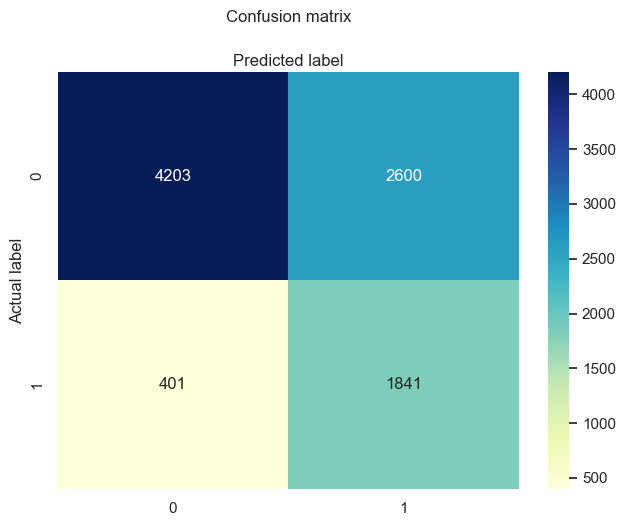

In [72]:
conf_matrix(y_pred_log)

##### ROC Curve Report

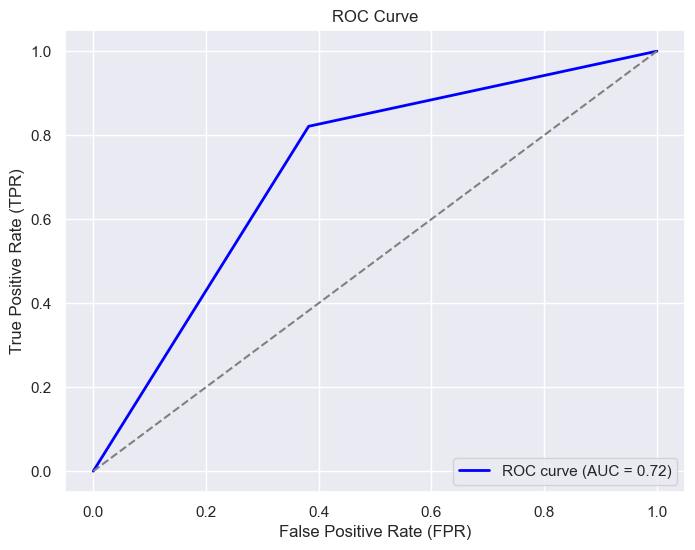

In [73]:
roc_cur(y_test, y_pred_log)

#### 6.4.2 LinearSVC

##### Model Preparation

In [74]:
X_train_svc, X_test_svc, features_svc = feature_selector(svc_model)

In [75]:
evalute_model(svc_model, X_train_svc, 'tree', features_svc)

Model: LinearSVC(random_state=80)
Średnia F1: 0.6873
Liczba cech : 3.0000


In [76]:
y_pred_svc = train_model(svc_model, 'tree', X_train_svc, X_test_svc)

##### Classification Report

In [77]:
class_report(y_pred_svc)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.867720  0.742467  0.800222  6803.000000
Over 50K       0.456576  0.656557  0.538602  2242.000000
accuracy       0.721172  0.721172  0.721172     0.721172
macro avg      0.662148  0.699512  0.669412  9045.000000
weighted avg   0.765809  0.721172  0.735374  9045.000000


##### Confusion Matrix

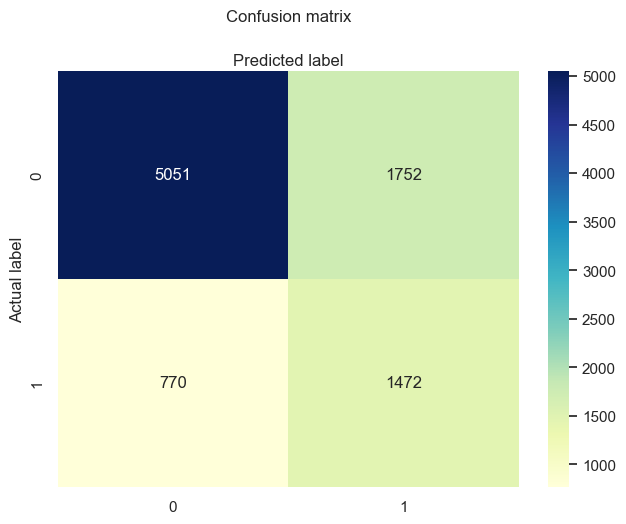

In [78]:
conf_matrix(y_pred_svc)

##### ROC Curve Report

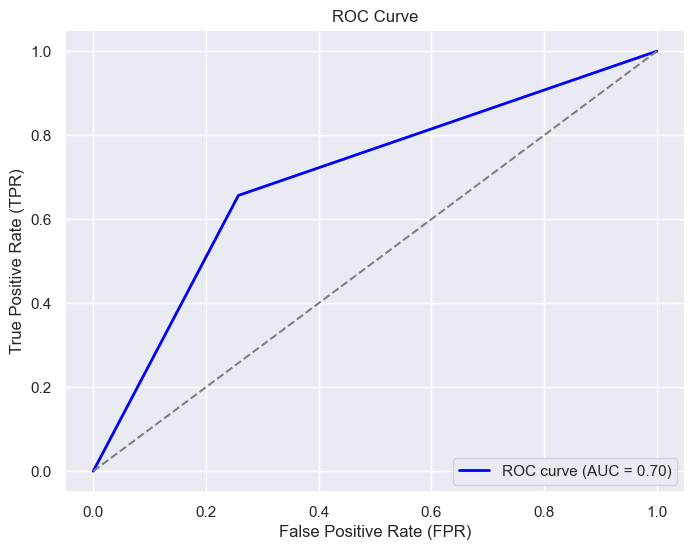

In [79]:
roc_cur(y_test, y_pred_svc)

#### 6.4.3 Naive Baise

##### Model Preparation

In [80]:
X_train_nb, X_test_nb, features_nb = feature_selector(nb_model)

Erorr {ve}. This model don"t have feature selector, need to use default RandomForestSelector


In [ ]:
evalute_model(nb_model, X_train_nb, 'tree', features_nb)

Model: GaussianNB()
Średnia F1: 0.4229
Liczba cech : 15.0000


In [ ]:
y_pred_nb = train_model(nb_model, 'tree', X_train_nb, X_test_nb)

##### Classification Report

In [ ]:
class_report(y_pred_nb)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.804048  0.951786  0.871702  6803.000000
Over 50K       0.669355  0.296164  0.410637  2242.000000
accuracy       0.789276  0.789276  0.789276     0.789276
macro avg      0.736702  0.623975  0.641169  9045.000000
weighted avg   0.770662  0.789276  0.757417  9045.000000


##### Confusion Matrix

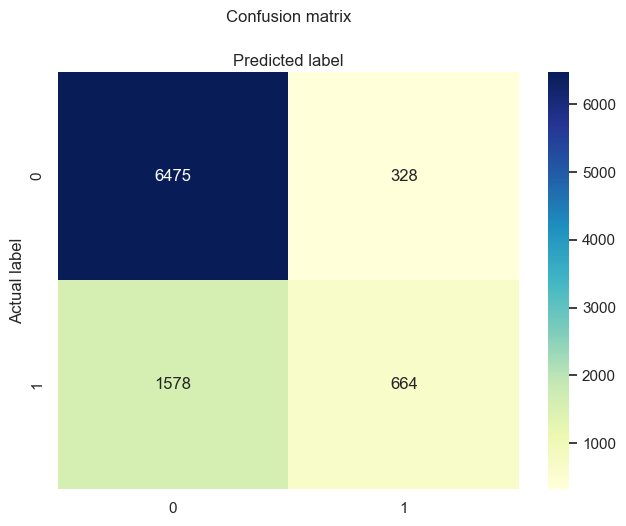

In [ ]:
conf_matrix(y_pred_nb)

##### ROC Curve Report

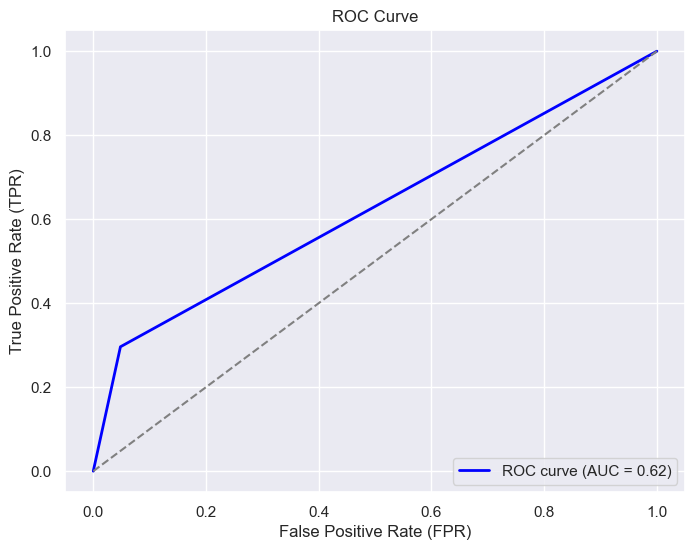

In [ ]:
roc_cur(y_test, y_pred_nb)

#### 6.4.4 KNN

##### Model Preparation

In [ ]:
X_train_knn, X_test_knn, features_knn = feature_selector(knn_model)

Erorr {ve}. This model don"t have feature selector, need to use default RandomForestSelector


In [ ]:
evalute_model(knn_model, X_train_knn, 'tree', features_knn)

Model: KNeighborsClassifier()
Średnia F1: 0.6292
Liczba cech : 15.0000


In [ ]:
y_pred_knn = train_model(knn_model, 'tree', X_train_knn, X_test_knn)

##### Classification Report

In [ ]:
class_report(y_pred_knn)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.924385  0.751139  0.828805  6803.000000
Over 50K       0.518624  0.813559  0.633443  2242.000000
accuracy       0.766611  0.766611  0.766611     0.766611
macro avg      0.721504  0.782349  0.731124  9045.000000
weighted avg   0.823808  0.766611  0.780381  9045.000000


##### Confusion Matrix

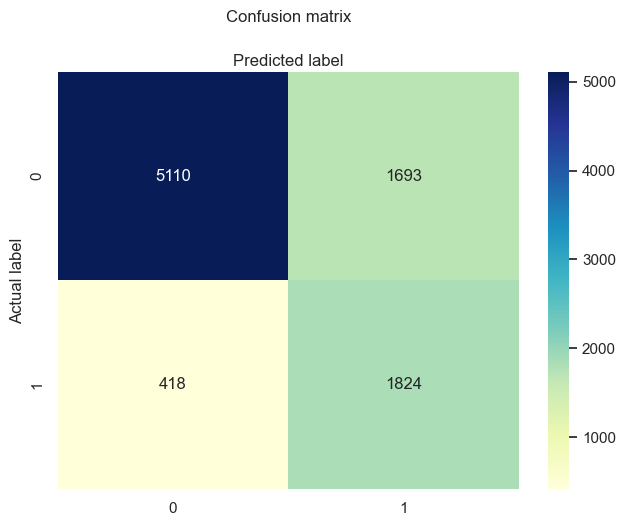

In [ ]:
conf_matrix(y_pred_knn)

##### ROC Curve Report

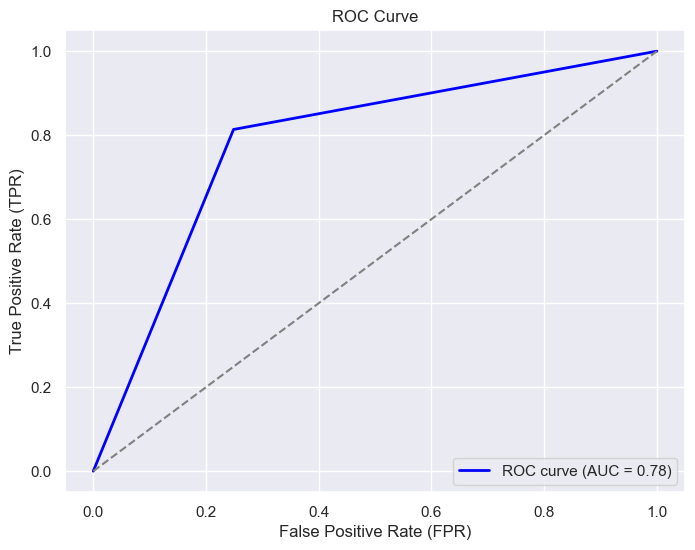

In [ ]:
roc_cur(y_test, y_pred_knn)

#### 6.4.5 Decision Tree

##### Model Preparation

In [ ]:
X_train_tree, X_test_tree, features_tree = feature_selector(dec_model)

In [ ]:
evalute_model(dec_model, X_train_tree, 'tree', features_tree)

Model: DecisionTreeClassifier(random_state=80)
Średnia F1: 0.6578
Liczba cech : 3.0000


In [ ]:
y_pred_tree = train_model(dec_model, 'tree', X_train_tree, X_test_tree)

##### Classification Report

In [ ]:
class_report(y_pred_tree)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.959240  0.719535  0.822274  6803.000000
Over 50K       0.515982  0.907226  0.657827  2242.000000
accuracy       0.766059  0.766059  0.766059     0.766059
macro avg      0.737611  0.813381  0.740051  9045.000000
weighted avg   0.849369  0.766059  0.781513  9045.000000


##### Confusion Matrix

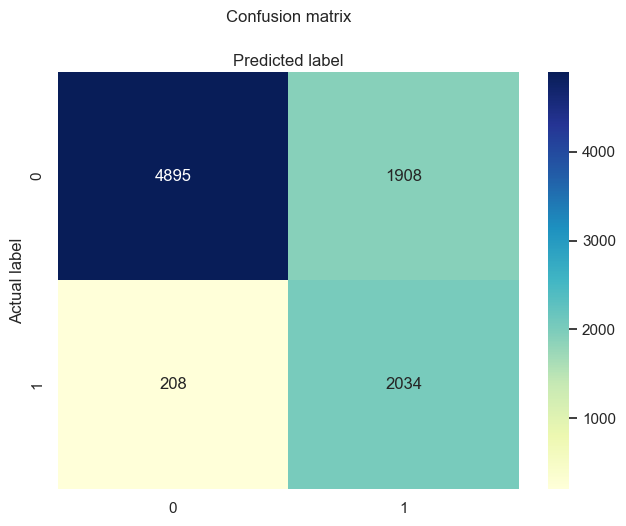

In [ ]:
conf_matrix(y_pred_tree)

##### ROC Curve Report

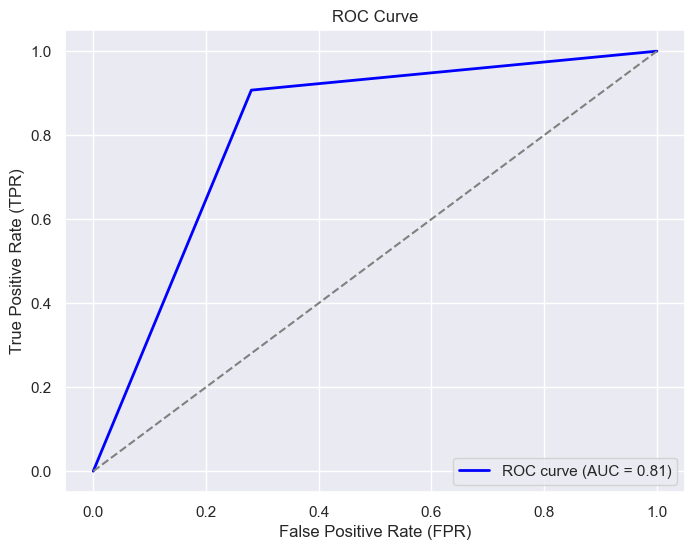

In [ ]:
roc_cur(y_test, y_pred_tree)

#### 6.4.6 Random Forest

##### Model Preparation


In [ ]:
X_train_rf, X_test_rf, features_rf = feature_selector(ran_model)

In [ ]:
evalute_model(ran_model, X_train_rf, 'tree', features_rf)

Model: RandomForestClassifier(random_state=80)
Średnia F1: 0.6659
Liczba cech : 15.0000


In [ ]:
y_pred_rf = train_model(ran_model, 'tree', X_train_rf, X_test_rf)

##### Classification Report

In [ ]:
class_report(y_pred_rf)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.889863  0.895487  0.892666  6803.000000
Over 50K       0.676671  0.663693  0.670119  2242.000000
accuracy       0.838032  0.838032  0.838032     0.838032
macro avg      0.783267  0.779590  0.781393  9045.000000
weighted avg   0.837019  0.838032  0.837503  9045.000000


##### Confusion Matrix

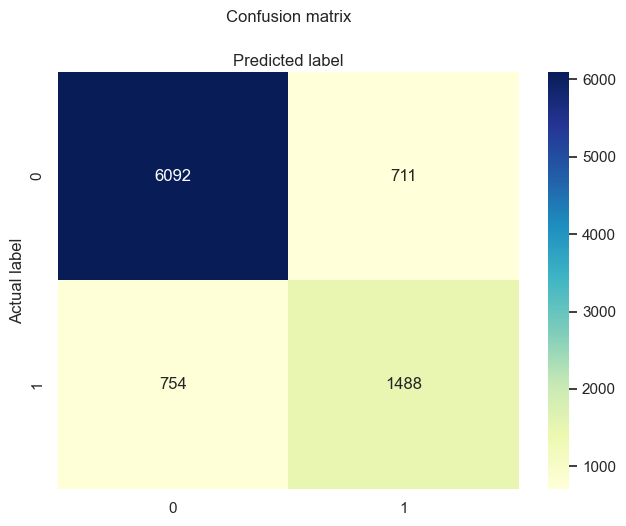

In [ ]:
conf_matrix(y_pred_rf)

##### ROC Curve Report

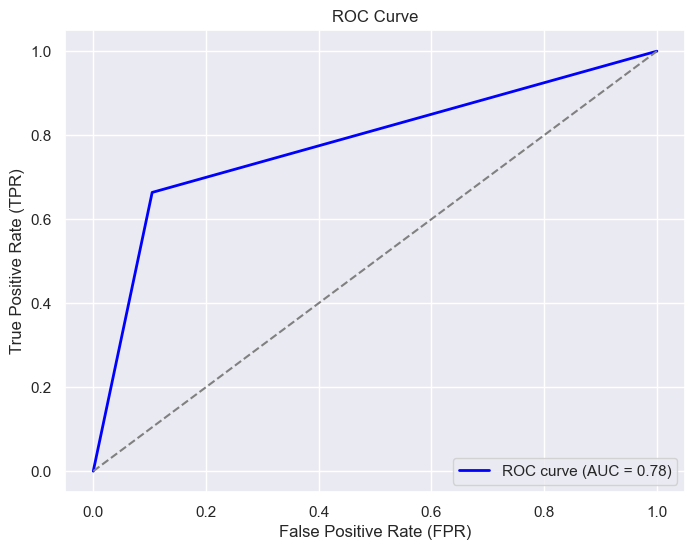

In [ ]:
roc_cur(y_test, y_pred_rf)

#### 6.4.7 Ada Boost

##### Model Preperation

In [ ]:
X_train_ada, X_test_ada, feature_ada = feature_selector(ada_model)

In [ ]:
evalute_model(ada_model, X_train_ada, 'tree', feature_ada)

Model: AdaBoostClassifier(random_state=80)
Średnia F1: 0.6799
Liczba cech : 14.0000


In [ ]:
y_pred_ada = train_model(ada_model, 'tree', X_train_ada, X_test_ada)

##### Classification Report

In [ ]:
class_report(y_pred_ada)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.937157  0.802293  0.864497  6803.000000
Over 50K       0.582428  0.836753  0.686802  2242.000000
accuracy       0.810835  0.810835  0.810835     0.810835
macro avg      0.759792  0.819523  0.775649  9045.000000
weighted avg   0.849229  0.810835  0.820451  9045.000000


##### Confusion Matrix

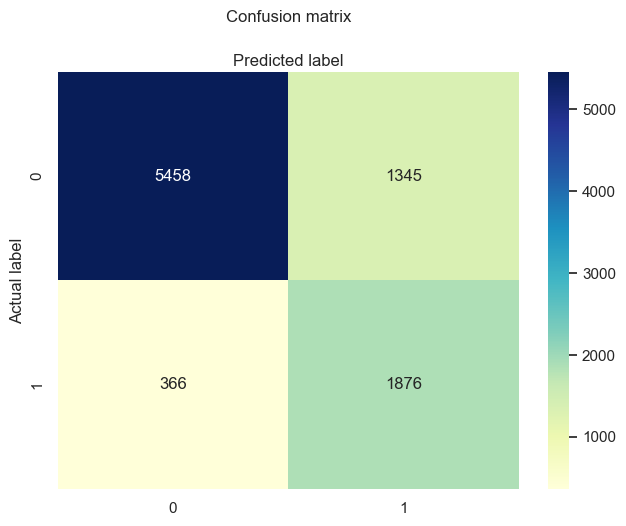

In [ ]:
conf_matrix(y_pred_ada)

##### ROC Curve Report

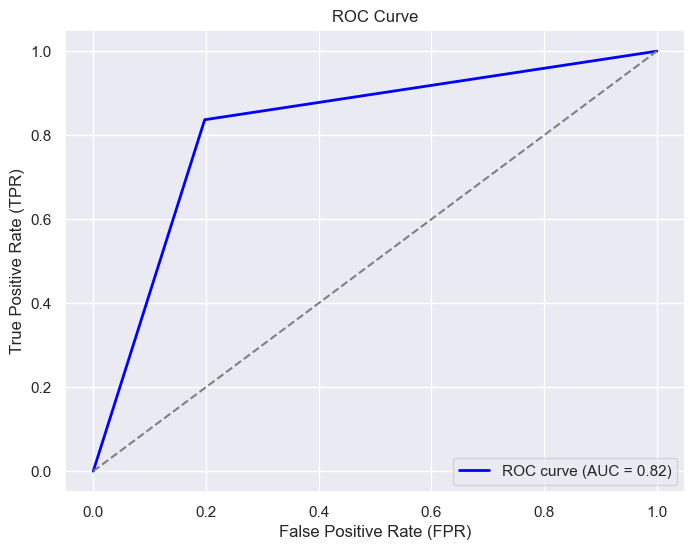

In [ ]:
roc_cur(y_test, y_pred_ada)

#### 6.4.8 Gradient

##### Model Preperation

In [ ]:
X_train_gra, X_test_gra, feature_gra = feature_selector(gra_model)

In [ ]:
evalute_model(gra_model, X_train_gra, 'tree', feature_gra)

Model: GradientBoostingClassifier(random_state=80)
Średnia F1: 0.7008
Liczba cech : 12.0000


In [ ]:
y_pred_gra = train_model(gra_model, 'tree', X_train_gra, X_test_gra)

##### Classification Report

In [ ]:
class_report(y_pred_gra)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.939333  0.819344  0.875245  6803.000000
Over 50K       0.604950  0.839429  0.703157  2242.000000
accuracy       0.824323  0.824323  0.824323     0.824323
macro avg      0.772141  0.829387  0.789201  9045.000000
weighted avg   0.856449  0.824323  0.832590  9045.000000


#### Confusion Matrix

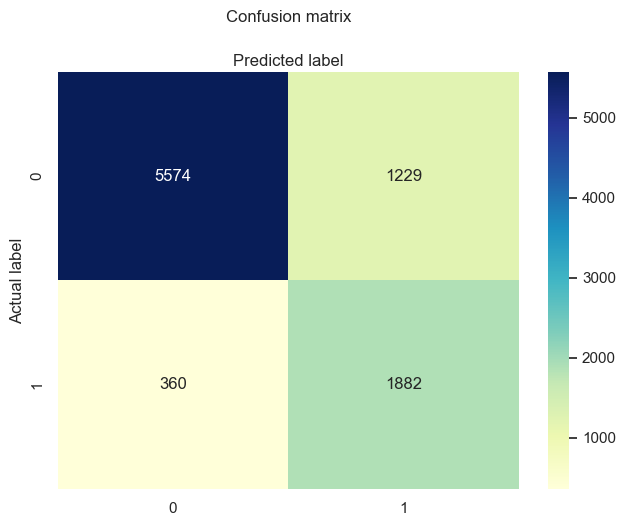

In [ ]:
conf_matrix(y_pred_gra)

##### ROC Curve Report

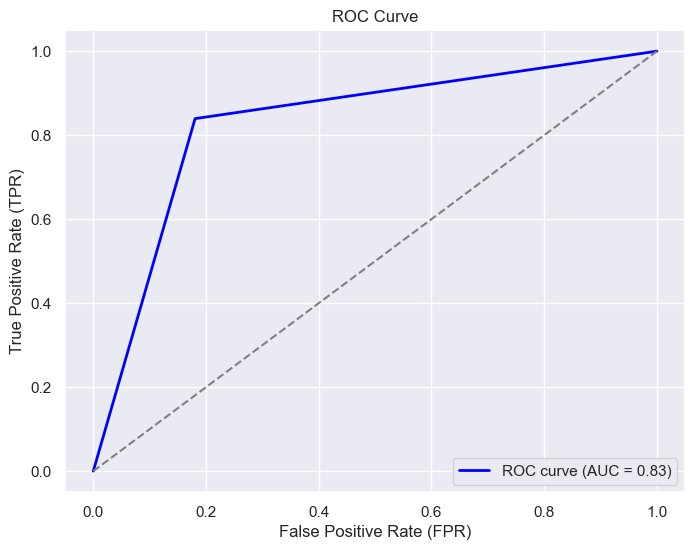

In [ ]:
roc_cur(y_test, y_pred_gra)

#### 6.4.9 XGBoost

##### Model Preparation

In [ ]:
X_train_xgb, X_test_xgb, feature_xgb = feature_selector(xgb_model)

In [ ]:
evalute_model(xgb_model,X_train_xgb, 'tree', feature_xgb)

Model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=80, ...)
Średnia F1: 0.8516
Liczba cech : 13.0000


In [ ]:
y_pred_xgb = train_model(xgb_model, 'tree', X_train_xgb, X_test_xgb)

##### Classification Report

In [ ]:
class_report(y_pred_xgb)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.921928  0.880053  0.900504  6803.000000
Over 50K       0.680125  0.773863  0.723972  2242.000000
accuracy       0.853731  0.853731  0.853731     0.853731
macro avg      0.801027  0.826958  0.812238  9045.000000
weighted avg   0.861992  0.853731  0.856747  9045.000000


##### Confusion Matrix

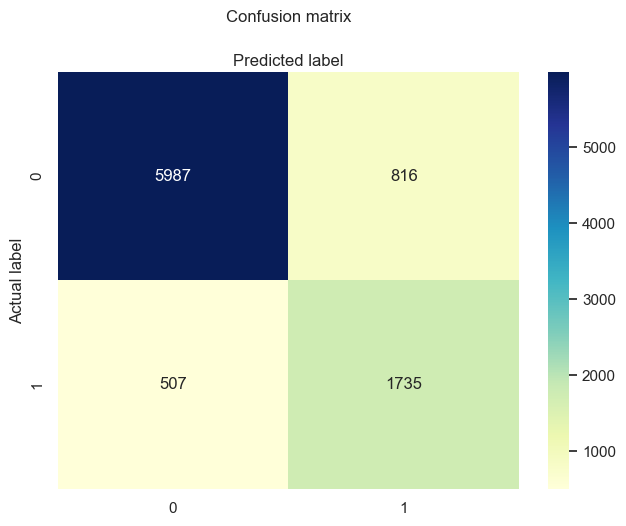

In [ ]:
conf_matrix(y_pred_xgb)

##### ROC Curve Report

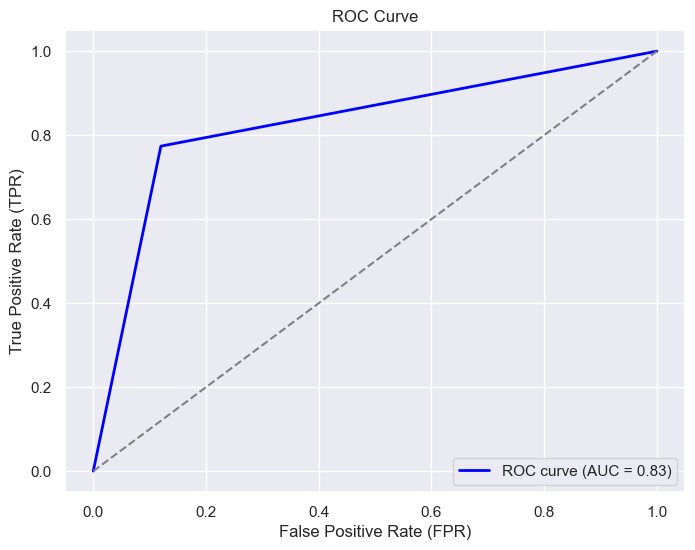

In [ ]:
roc_cur(y_test, y_pred_xgb)

### 6.5 Hiperparam Perf

In [ ]:
def hiper_param(trials) :
    param = {
        'booster': trials.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'base_score': trials.suggest_float('base_score', 0.1, 0.9),
        'n_estimators' : trials.suggest_int('n_estimators', 1, 200),
        'learning_rate' : trials.suggest_float('learning_rate', 0.01, 0.3),
        'max_depth' : trials.suggest_int('max_depth', 2, 10),
        'gamma' : trials.suggest_float('gamma', 0, 5),
        'reg_alpha' : trials.suggest_float('reg_alpha', 0, 0.05),
        'reg_lambda' : trials.suggest_float('reg_lambda', 0, 0.05),
        'random_state' : SEED,
        'tree_method':'hist',
        'n_jobs' : -1
    }
    model = XGBClassifier(**param)

    pipeline = Pipeline(steps=[
            ('adasyn', adasyn),
            ('classification', model)
            ])
    
    score = cross_val_score(pipeline, X_train_xgb, y_train, cv = skf, scoring = 'accuracy')
    return score.mean()

In [ ]:
study_xb = opt.create_study(direction='maximize', pruner=opt.pruners.MedianPruner())
study_xb.optimize(hiper_param, n_trials=50, n_jobs= -1)

[I 2024-06-12 22:37:35,127] A new study created in memory with name: no-name-268564d2-ca7f-4191-ba6c-74465690dc7c
[I 2024-06-12 22:37:46,638] Trial 10 finished with value: 0.7765431614865853 and parameters: {'booster': 'gblinear', 'base_score': 0.17245930674027143, 'n_estimators': 14, 'learning_rate': 0.015131108722742401, 'max_depth': 10, 'gamma': 1.4678138825208298, 'reg_alpha': 0.043368217088556454, 'reg_lambda': 0.023975444713539386}. Best is trial 10 with value: 0.7765431614865853.
[I 2024-06-12 22:37:47,887] Trial 3 finished with value: 0.6847994955728918 and parameters: {'booster': 'gblinear', 'base_score': 0.19461411844246107, 'n_estimators': 28, 'learning_rate': 0.212449827658363, 'max_depth': 4, 'gamma': 4.729073055363475, 'reg_alpha': 0.019857688418591524, 'reg_lambda': 0.01433213848126564}. Best is trial 10 with value: 0.7765431614865853.
[I 2024-06-12 22:37:51,029] Trial 7 finished with value: 0.6777507265179133 and parameters: {'booster': 'gblinear', 'base_score': 0.33882

In [ ]:
# Best Params
print('Best Params: ', study_xb.best_params)

Best Params:  {'booster': 'gbtree', 'base_score': 0.6665238605238355, 'n_estimators': 199, 'learning_rate': 0.15844679065124273, 'max_depth': 7, 'gamma': 0.06562815024153301, 'reg_alpha': 0.0001718913805725088, 'reg_lambda': 0.016227542585331368}


In [ ]:
# Init model with best params
best_xb_params = study_xb.best_params
best_xb_model = XGBClassifier(**best_xb_params)

In [ ]:
# Train and Precit Best Param Model
y_pred_xbh = train_model(best_xb_model, 'tree', X_train_xgb, X_test_xgb)

#### Classification Report

In [ ]:
class_report(y_pred_xbh)

Classification Report:
              precision    recall  f1-score      support
Under 50K      0.919793  0.890049  0.904677  6803.000000
Over 50K       0.696182  0.764496  0.728741  2242.000000
accuracy       0.858928  0.858928  0.858928     0.858928
macro avg      0.807988  0.827272  0.816709  9045.000000
weighted avg   0.864366  0.858928  0.861067  9045.000000


#### Confusion Matrix

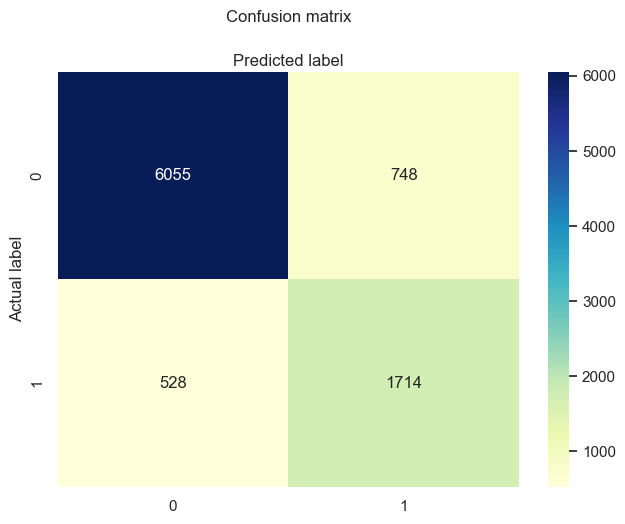

In [ ]:
conf_matrix(y_pred_xbh)

#### ROC Curve Report

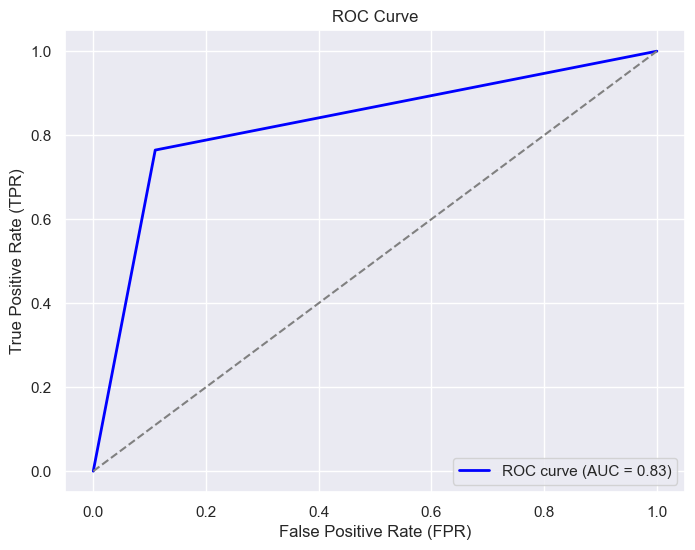

In [ ]:
roc_cur(y_test, y_pred_xbh)